# Принятие решений в бизнесе

**Описание проекта:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Описание данных:**

**Данные для первой части:**

**Файл /datasets/hypothesis.csv:**
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**

**Файл /datasets/orders.csv:**
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv:**
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

## **Предобработка данных**

### Выгрузим библиотеки и ознакомимся с датафреймами

In [1]:
#Выгрузим библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta
import time
import random
import warnings
warnings.filterwarnings("ignore")
import re
import ast
from scipy import stats as st
pd.options.display.max_colwidth = 130

In [2]:
#Загрузим датафреймы
#Файл /datasets/hypothesis.csv
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')


In [3]:
#Файл /datasets/orders.csv
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

In [4]:
#Файл /datasets/visitors.csv
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
#Ознакомимся с датафреймом hypothesis
display(hypothesis.head(10))
hypothesis.info()
print('---------------------')
print('Дубликатов в датафрейме -', hypothesis.duplicated().sum())
print('Пропусков в датафрейме -', hypothesis.isna().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
---------------------
Дубликатов в датафрейме - 0
Пропусков в датафрейме - Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


In [6]:
#Ознакомимся с датафреймом orders
display(orders.head(10))
orders.info()
print('---------------------')
print('Дубликатов в датафрейме -', orders.duplicated().sum())
print('Пропусков в датафрейме -', orders.isna().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
---------------------
Дубликатов в датафрейме - 0
Пропусков в датафрейме - transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [7]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
#Ознакомимся с датафреймом visitors
display(visitors.head(10))
visitors.info()
print('---------------------')
print('Дубликатов в датафрейме -', visitors.duplicated().sum())
print('Пропусков в датафрейме -', visitors.isna().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
---------------------
Дубликатов в датафрейме - 0
Пропусков в датафрейме - date        0
group       0
visitors    0
dtype: int64


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Выгрузили библиотеки;
- Загрузили датафреймы;
- Пропусков и дубликатов в данных не обнаружено;
- Столбы в hypothesis нужно привести к нижнему регистру;
- Также столбцы с датами нужно привести к правильному типу.

### Предобработка данных

In [9]:
#Приведем столбцы к правильному виду
hypothesis.columns = hypothesis.columns.str.lower()

In [10]:
#Приведем столбцы с датами к правильному типу
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Привели столбцы к правильным видам и типам

## **Анализ столбца "group"**

In [11]:
#Проверим сколько всего видов групп в orders
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [12]:
#Посчитаем количество
orders_group = orders['group'].value_counts()
orders_group

B    640
A    557
Name: group, dtype: int64

In [13]:
#Переведем данные в проценты
orders_group['rate'] = round(orders['group'].value_counts() / orders_group.sum(), 2) * 100
orders_group['rate']

B    53.0
A    47.0
Name: group, dtype: float64

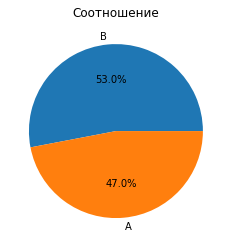

In [14]:
#Посмотрим на графике
plt.pie(orders_group['rate'], labels=orders_group['rate'].index, autopct='%1.1f%%')
plt.title('Соотношение')
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** Групп "B" больше, чем групп "А" - 53%:47%

## **Часть 1. Приоритизация гипотез**

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [15]:
#Применим фреймворк ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].astype('float')
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).head(10))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Вывод:**

Самыми приоритетными гипотезами по ICE, являются:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.


###  Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [16]:
#Применим фреймфорк RICE
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
hypothesis['RICE'] = hypothesis['RICE'].astype('float')
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False).head(10))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**

Самыми приоритетными гипотезами по RICE, являются:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**

- В основном, главным различие является различное положение гипотез относительно фреймворка RICE от ICE. Это можно объяснить тем, что в RICE используется компонент Reach - т.е. скольких пользователей затронет изменение, которое мы хотим внести. 

- Если пройтись по приоритетным гипотезам, то можно сказать о том, что гипотеза "Запустить акцию, дающую скидку на товар в день рождения" является приоритетной только в случае фреймворка "ICE", т.к. не были учтен компонент Reach

- В случае же с другими приоритетными гипотезами почти все идентично, они так и остаются приоритетными, а именно: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

## **Часть 2. Анализ A/B-теста**

### Построим график кумулятивной выручки по группам

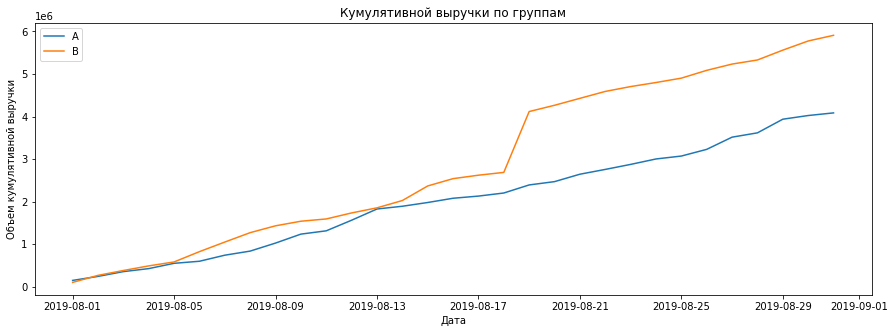

In [17]:
#Построим график
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.legend()
plt.title("Кумулятивной выручки по группам")
plt.ylabel("Объем кумулятивной выручки")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Кумулятивная выручка группы "B" выше, чем у группы "A"
- После 2019-08-17 график группы "B" резко пошел вверх. На данный момент сложно сказать, почему произошел такой скачок

### Построим график кумулятивного среднего чека по группам

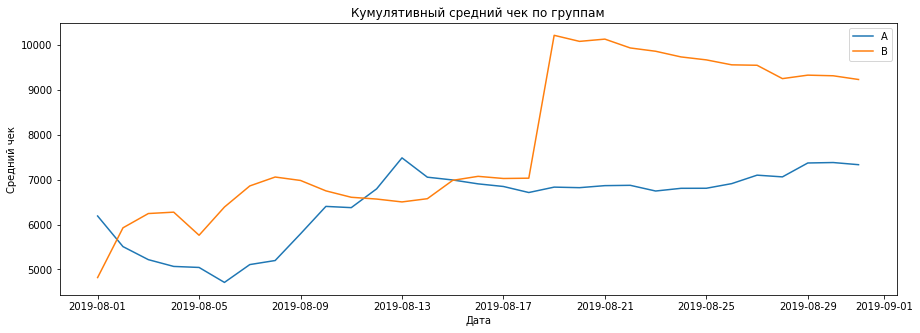

In [18]:
#Построим график
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'],cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.legend()
plt.title("Кумулятивный средний чек по группам")
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Начиная с 2019-08-01 по 2019-08-17 графики показывают постоянно меняющееся положение кумулятивного среднего чека у групп
- После 2019-08-17 происходит скачок в пользу группы "B", после чего графики выравниваются. Также пока сложно сказать, почему произошел такой скачок, можно лишь предположить, что в группе "B" были совершенны крупные покупки, которые превышают значения среднего чека

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

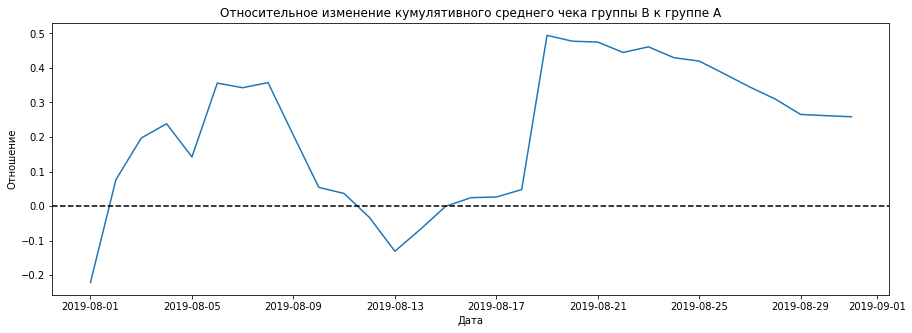

In [19]:
#Построим график
mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе А")
plt.ylabel("Отношение")
plt.xlabel("Дата")
plt.show()


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Относительное изменение кумулятивного среднего чека группы "B" значительно превышает значения группы "A"
- Однако, значение в период 2019-08-13 может относится к предположению о крупной покупке

### Построим график кумулятивного среднего количества заказов на посетителя по группам

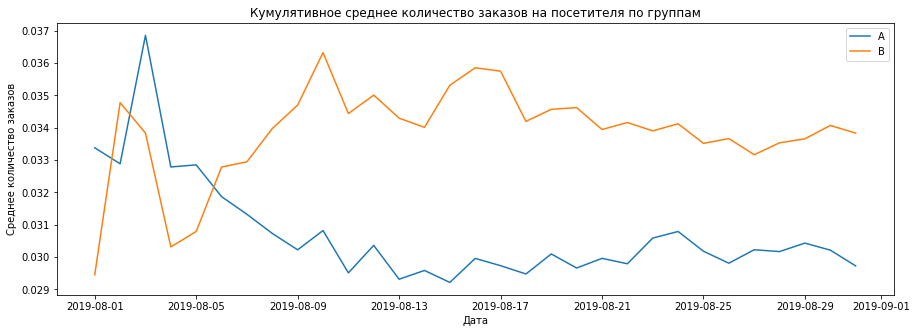

In [20]:
#Построим график
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")
plt.ylabel("Среднее количество заказов")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Кумулятивное среднее количество заказов на посетителя в группе "B" превышает значение в группе "A"

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

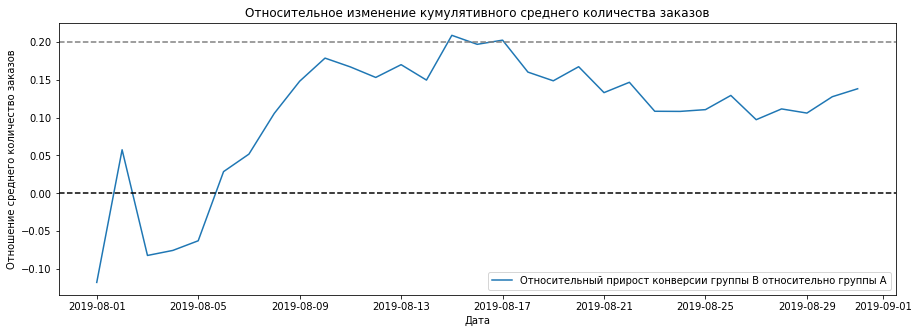

In [21]:
#Построим график
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего количества заказов")
plt.ylabel("Отношение среднего количество заказов")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
Относительное изменение кумулятивного среднего количество заказов в группе "B" превышает значение в группе "A"

### Построим точечный график количества заказов по пользователям

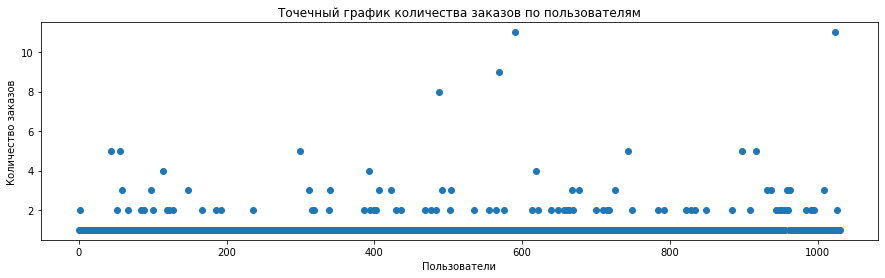

In [22]:
#Построим график
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** Большинство пользователей покупали всего 1 заказ, однако есть и пользователи, которые купили больше 10

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
#Считаем процентиль
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** Не более 2% пользователей совершали больше 2х продаж, и не более 4% пользователей - больше 4%. Однако эти данные не очищены, после очистки процент должен измениться

### Построим точечный график стоимостей заказов

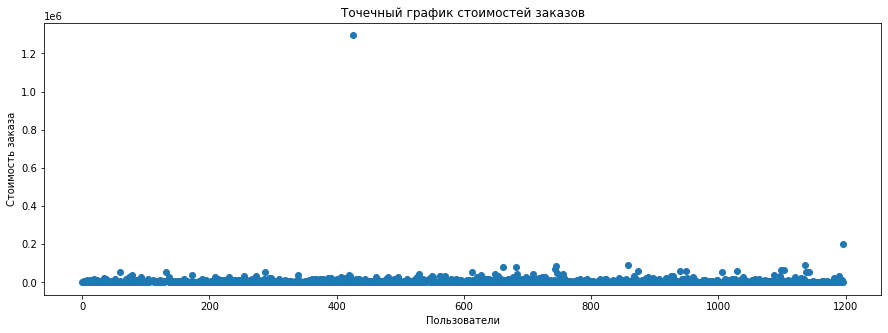

In [24]:
#Построим график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов")
plt.ylabel("Стоимость заказа")
plt.xlabel("Пользователи")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- По графику можно заметить, что стоимость заказов не превышает 20000, колеблится где-то около 15000;
- Также можно увидеть 2 выброса

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [25]:
#Считаем перцентиль
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 58233 является той суммой, которую не превышают 99% пользователей, у оставшегося 1% стоимость выше

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Гипотеза:**

**H_0:** Различий в среднем количество заказов на посетителя между группами по "сырым" данным нет

**H_1:** Различия в среднем количество заказов на посетителя между группами по "сырым" данным есть

In [26]:
#Проверяем гипотезу
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [27]:
print('p_value -',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))


p_value - 0.01679


In [28]:
print('Разница между группами -',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

Разница между группами - 0.138


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Отвергаем нулевую гипотезу, т.к. p_value (0.01679) < alpha (0.05)
- Разница между группами - 0.138 (13.8%)
                                                           

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Гипотеза:**

- **H_0:** Различий по статистическим значимостям в среднем чеке заказа между группами по "сырым" данным нет
- **H_1:** Различия по статистическим значимостям в среднем чеке заказа между группами по "сырым" данным есть

In [29]:
print('p_value -','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

p_value - 0.729


In [30]:
print('Разница между группами -','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Разница между группами - 0.259


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Не отвергаем нулевую гипотезу, т.к. p_value (0.729) > alpha(0.05)
- Разница между группами - 0.259 (25.9%)

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Гипотеза:**

- **H_0:** Различий между статистической значимостью в среднем количестве заказов на посетителя между группами по "очищенным данным" нет

- **H_1:** Различия между статистической значимостью в среднем количестве заказов на посетителя между группами по "очищенным данным" есть

In [31]:
#Чистим данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#print(abnormalUsers.head(5))
print('Убрано пользователей -',abnormalUsers.shape[0]) 

Убрано пользователей - 15


In [32]:
# Проверяем гипотезу
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [33]:
print('p_value -','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

p_value - 0.014


In [34]:
print('Различия между группами -','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Различия между группами - 0.153


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
- Отвергаем нулевую гипотезу, т.к. p_value (0.014) < alpha(0.05)
- Разница между группами - 0.153 (15.3%)
- Вывод остался прежним                                                              

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Гипотеза:**

**H_0:** Различий в статистической значимости в среднем чеке заказа между группами по "очищенным" данным нет

**H_1:** Различия в статистической значимости в среднем чеке заказа между группами по "очищенным" данным есть

In [35]:
#Проверим гипотезу
print('p_value -',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

p_value - 0.851


In [36]:
print('Различия в среднем чеке -',
    '{0:.3f}'.format(
        
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean() /
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean()-1
    )
)

Различия в среднем чеке - 0.006


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
- Так как p_value (0.851) > alpha (0.05), то мы не отвергаем нулевую гипотезу;
- Различия в среднем чеке - 0.006
- Выводы совпадают

### Принятие решения по результатам теста

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
- На основании полученных результатов после анализа статистической значимости, можно сделать вывод, что группа "B" превышает значения группы "А".
- Следовательно, продолжать тестирование не имеет смысла, фиксируем победу группы "В"